In [1]:
import os
from pathlib import Path
from datetime import datetime
import pandas as pd

# ── CONFIGURE HERE ─────────────────────────────────────────────────────────
BASE_DIRS = [
    Path("/data/big_rim/rsync_dcc_sum/Oct3V1"),
    Path("/data/big_rim/rsync_dcc_sum/24summ"),
    Path("/data/big_rim/rsync_dcc_sum/25Apri_social")  # add as many base dirs as you like
]
OUT_CSV = "dead_camera_summary.csv"
CAMERAS = [f"Camera{i}" for i in range(1, 7)]

def file_ctime(path: Path) -> float:
    """Return file creation time as a POSIX timestamp."""
    return path.stat().st_ctime

def fmt_ts(ts: float) -> str:
    """Format a POSIX timestamp to ISO string."""
    return datetime.fromtimestamp(ts).isoformat(sep=' ', timespec='seconds')

# ── ANALYSIS ───────────────────────────────────────────────────────────────
rows = []

for base_dir in BASE_DIRS:
    if not base_dir.exists():
        print(f"Warning: {base_dir} does not exist, skipping.")
        continue

    for date_dir in sorted(base_dir.iterdir()):
        if not date_dir.is_dir():
            continue

        good_so_far = 0
        for rec_dir in sorted(date_dir.iterdir()):
            if not rec_dir.is_dir():
                continue

            rel_path = f"{base_dir.name}/{rec_dir.relative_to(base_dir)}"
            video_root = rec_dir / "videos"

            missing = []
            ctimes = {}
            for cam in CAMERAS:
                ft = video_root / cam / "frametimes.mat"
                if ft.exists():
                    ctimes[cam] = fmt_ts(file_ctime(ft))
                else:
                    missing.append(cam)

            if not missing:
                good_so_far += 1
                continue

            row = {
                "base_dir": base_dir.name,
                "relative_path": rel_path,
                "dead_cameras": ",".join(missing),
                "prev_good_count": good_so_far
            }
            for cam in CAMERAS:
                row[f"{cam}_ctime"] = ctimes.get(cam, "")
            rows.append(row)

# ── OUTPUT ─────────────────────────────────────────────────────────────────
df = pd.DataFrame(rows)
df.index.name = 'event_index'
df  # display the DataFrame in Jupyter

# Save to CSV if desired
df.to_csv(OUT_CSV, index=False)
print(f"\nSummary written to {OUT_CSV} ({len(df)} dead-camera events)")



Summary written to dead_camera_summary.csv (310 dead-camera events)


,base_dir,relative_path,dead_cameras,prev_good_count,is_dead,Camera1_ctime,Camera2_ctime,Camera3_ctime,Camera4_ctime,Camera5_ctime,Camera6_ctime
0,Oct3V1,Oct3V1/2024_09_18/20240707-PMC-r1,,0,False,2024-12-09 18:11:05,2024-12-09 18:11:19,2024-12-09 18:11:28,2024-12-09 18:11:36,2024-12-09 18:11:49,2024-12-09 18:11:56
1,Oct3V1,Oct3V1/2024_09_18/20240819-V1-r2,,1,False,2024-12-09 18:12:56,2024-12-09 18:13:22,2024-12-09 18:13:43,2024-12-09 18:14:02,2024-12-09 18:14:29,2024-12-09 18:14:49
2,Oct3V1,Oct3V1/2024_09_18/20240819_V1_r1,,2,False,2024-12-09 18:16:01,2024-12-09 18:16:35,2024-12-09 18:17:03,2024-12-09 18:17:27,2024-12-09 18:18:05,2024-12-09 18:18:20
3,Oct3V1,Oct3V1/2024_09_18/20240819_V1_r1_2,,3,False,2024-12-09 18:19:41,2024-12-09 18:20:22,2024-12-09 18:20:48,2024-12-09 18:21:12,2024-12-09 18:21:52,2024-12-09 18:22:11
4,Oct3V1,Oct3V1/2024_10_03/20240819V1r2,,0,False,2024-12-09 18:32:59,2024-12-09 18:33:18,2024-12-09 18:33:39,2024-12-09 18:33:59,2024-12-09 18:34:20,2024-12-09 18:34:39
...,...,...,...,...,...,...,...,...,...,...,...
257,24summ,24summ/2024_08_26/20240717_PMCr1,,0,False,2024-12-09 23:18:27,2024-12-09 23:18:41,2024-12-09 23:18:51,2024-12-09 23:18:59,2024-12-09 23:19:11,2024-12-09 23:19:18
258,24summ,24summ/2024_08_26/20240717_PMCr2,,1,False,2024-12-09 23:20:07,2024-12-09 23:20:21,2024-12-09 23:20:30,2024-12-09 23:20:39,2024-12-09 23:20:50,2024-12-09 23:20:57
259,24summ,24summ/2024_08_26/20240730_PMCr2,Camera3,2,True,2024-12-09 23:21:11,2024-12-09 23:21:25,,2024-12-09 23:21:42,2024-12-09 23:21:53,2024-12-09 23:22:00
260,24summ,24summ/2024_08_26/test_rec_12_36,,2,False,2024-12-09 23:27:26,2024-12-09 23:27:26,2024-12-09 23:27:26,2024-12-09 23:27:27,2024-12-09 23:27:28,2024-12-09 23:27:28


,metric,value
0,total_events,262
1,dead_events,62
2,good_events,200
3,percent_dead,23.7%


,camera,fail_count,fail_rate
0,Camera1,44,16.793893
1,Camera2,13,4.961832
2,Camera3,11,4.198473
3,Camera4,13,4.961832
4,Camera5,7,2.671756
5,Camera6,11,4.198473


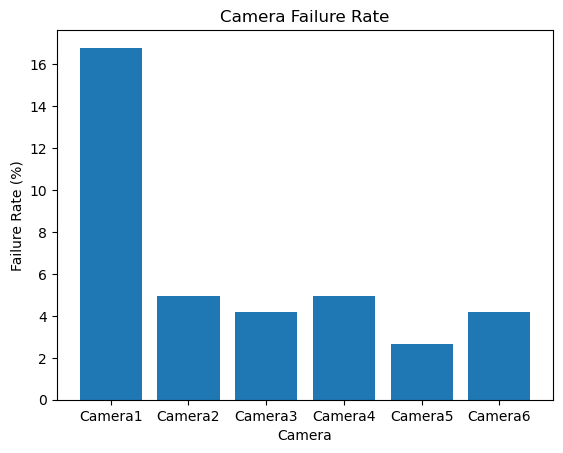

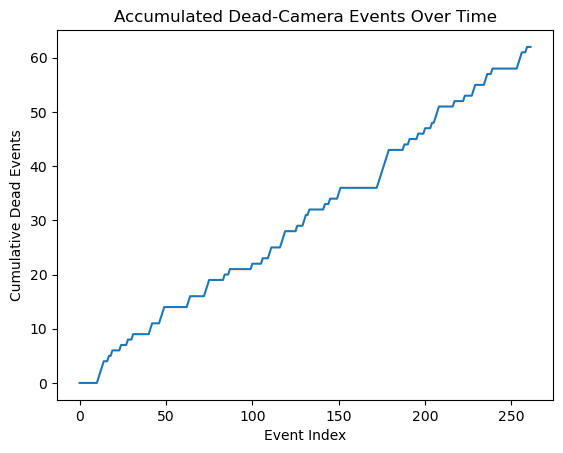

In [4]:
import os
from pathlib import Path
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import re

# ── CONFIGURE HERE ─────────────────────────────────────────────────────────
BASE_DIRS = [
    Path("/data/big_rim/rsync_dcc_sum/Oct3V1"),
    Path("/data/big_rim/rsync_dcc_sum/24summ"),
    # Path("/path/to/another/base_dir")  # add more as needed
]
IGNORE_PATTERNS = ["backup-files-rot-fix_hires_240930"]
CAMERAS = [f"Camera{i}" for i in range(1, 7)]
DATE_PATTERN = re.compile(r"^\d{4}_\d{2}_\d{2}$")

# ── HELPERS ─────────────────────────────────────────────────────────────────
def file_ctime(path: Path) -> float:
    return path.stat().st_ctime

def fmt_ts(ts: float) -> str:
    return datetime.fromtimestamp(ts).isoformat(sep=' ', timespec='seconds')

# ── GATHER DATA ─────────────────────────────────────────────────────────────
rows = []
for base_dir in BASE_DIRS:
    if not base_dir.exists():
        continue
    for date_dir in sorted(base_dir.iterdir()):
        # Only date folders YYYY_MM_DD
        if not date_dir.is_dir() or not DATE_PATTERN.match(date_dir.name):
            continue

        good_so_far = 0
        for rec_dir in sorted(date_dir.iterdir()):
            # Must be a recording folder with 'videos' subfolder
            video_root = rec_dir / "videos"
            if not rec_dir.is_dir() or not video_root.is_dir():
                continue
            # Ignore any folder with '#calib' in its name
            if "#calib" in rec_dir.name:
                continue

            # Skip unwanted patterns
            rel = rec_dir.relative_to(base_dir)
            if any(pat in str(rel) for pat in IGNORE_PATTERNS):
                continue

            # Check cameras
            missing = []
            ctimes = {}
            for cam in CAMERAS:
                ft = video_root / cam / "frametimes.mat"
                if ft.exists():
                    ctimes[cam] = fmt_ts(file_ctime(ft))
                else:
                    missing.append(cam)

            row = {
                "base_dir": base_dir.name,
                "relative_path": f"{base_dir.name}/{rel}",
                "dead_cameras": ",".join(missing),
                "prev_good_count": good_so_far,
                "is_dead": bool(missing)
            }
            for cam in CAMERAS:
                row[f"{cam}_ctime"] = ctimes.get(cam, "")
            rows.append(row)

            # Only increment good_so_far when fully healthy
            if not missing:
                good_so_far += 1

# ── BUILD DATAFRAME ─────────────────────────────────────────────────────────
df = pd.DataFrame(rows)
display(df)

# ── SUMMARY STATS ───────────────────────────────────────────────────────────
total = len(df)
if total == 0:
    print("No events found after filtering.")
else:
    dead_count = df["is_dead"].sum()
    good_count = total - dead_count
    percent_dead = dead_count / total * 100

    summary = pd.DataFrame({
        "metric": ["total_events", "dead_events", "good_events", "percent_dead"],
        "value": [total, dead_count, good_count, f"{percent_dead:.1f}%"]
    })
    display(summary)

    # per-camera failure rates
    rates = []
    for cam in CAMERAS:
        cam_fail = df["dead_cameras"].str.contains(cam).sum()
        rates.append({
            "camera": cam,
            "fail_count": cam_fail,
            "fail_rate": cam_fail / total * 100
        })
    rates_df = pd.DataFrame(rates)
    display(rates_df)

    # ── VISUALIZATIONS ───────────────────────────────────────────────────────
    plt.figure()
    plt.bar(rates_df["camera"], rates_df["fail_rate"])
    plt.xlabel("Camera")
    plt.ylabel("Failure Rate (%)")
    plt.title("Camera Failure Rate")
    plt.show()

    plt.figure()
    plt.plot(df["is_dead"].cumsum())
    plt.xlabel("Event Index")
    plt.ylabel("Cumulative Dead Events")
    plt.title("Accumulated Dead-Camera Events Over Time")
    plt.show()


,base_dir,relative_path,dead_cameras,prev_good_count,is_dead,Camera1_ctime,Camera1_time_s,Camera2_ctime,Camera2_time_s,Camera3_ctime,Camera3_time_s,Camera4_ctime,Camera4_time_s,Camera5_ctime,Camera5_time_s,Camera6_ctime,Camera6_time_s
0,Oct3V1,Oct3V1/2024_09_18/20240707-PMC-r1,,0,False,2024-12-09 18:11:05,910.424628,2024-12-09 18:11:19,910.422919,2024-12-09 18:11:28,910.421665,2024-12-09 18:11:36,910.423143,2024-12-09 18:11:49,910.188156,2024-12-09 18:11:56,910.156206
1,Oct3V1,Oct3V1/2024_09_18/20240819-V1-r2,,1,False,2024-12-09 18:12:56,910.424042,2024-12-09 18:13:22,910.422335,2024-12-09 18:13:43,910.421082,2024-12-09 18:14:02,910.422556,2024-12-09 18:14:29,910.421005,2024-12-09 18:14:49,910.422386
2,Oct3V1,Oct3V1/2024_09_18/20240819_V1_r1,,2,False,2024-12-09 18:16:01,930.434990,2024-12-09 18:16:35,930.433210,2024-12-09 18:17:03,930.431941,2024-12-09 18:17:27,930.433438,2024-12-09 18:18:05,929.664913,2024-12-09 18:18:20,930.100042
3,Oct3V1,Oct3V1/2024_09_18/20240819_V1_r1_2,,3,False,2024-12-09 18:19:41,930.435391,2024-12-09 18:20:22,930.433627,2024-12-09 18:20:48,930.432354,2024-12-09 18:21:12,930.433874,2024-12-09 18:21:52,930.432335,2024-12-09 18:22:11,930.433828
4,Oct3V1,Oct3V1/2024_10_03/20240819V1r2,,0,False,2024-12-09 18:32:59,474.975073,2024-12-09 18:33:18,474.974154,2024-12-09 18:33:39,475.173663,2024-12-09 18:33:59,475.007613,2024-12-09 18:34:20,475.040239,2024-12-09 18:34:39,475.007729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,24summ,24summ/2024_08_26/20240717_PMCr1,,0,False,2024-12-09 23:18:27,930.437259,2024-12-09 23:18:41,930.435534,2024-12-09 23:18:51,930.434191,2024-12-09 23:18:59,930.435711,2024-12-09 23:19:11,930.434148,2024-12-09 23:19:18,930.402253
258,24summ,24summ/2024_08_26/20240717_PMCr2,,1,False,2024-12-09 23:20:07,1000.473302,2024-12-09 23:20:21,1000.471442,2024-12-09 23:20:30,825.515216,2024-12-09 23:20:39,1000.471628,2024-12-09 23:20:50,1000.436617,2024-12-09 23:20:57,1000.471539
259,24summ,24summ/2024_08_26/20240730_PMCr2,Camera3,2,True,2024-12-09 23:21:11,930.438243,2024-12-09 23:21:25,930.436529,,0.000000,2024-12-09 23:21:42,930.436676,2024-12-09 23:21:53,930.435105,2024-12-09 23:22:00,930.436603
260,24summ,24summ/2024_08_26/test_rec_12_36,,2,False,2024-12-09 23:27:26,9.971741,2024-12-09 23:27:26,9.971714,2024-12-09 23:27:26,9.971702,2024-12-09 23:27:27,9.971718,2024-12-09 23:27:28,9.971710,2024-12-09 23:27:28,9.971729


,metric,value
0,total_events,262
1,dead_events,62
2,good_events,200
3,percent_dead,23.7%


,camera,total_time_hr,fail_count,fail_rate_per_hr
0,Camera1,51.295097,44,0.857782
1,Camera2,57.309357,13,0.226839
2,Camera3,56.964027,11,0.193104
3,Camera4,57.082366,13,0.227741
4,Camera5,57.220465,7,0.122334
5,Camera6,57.333665,11,0.191859


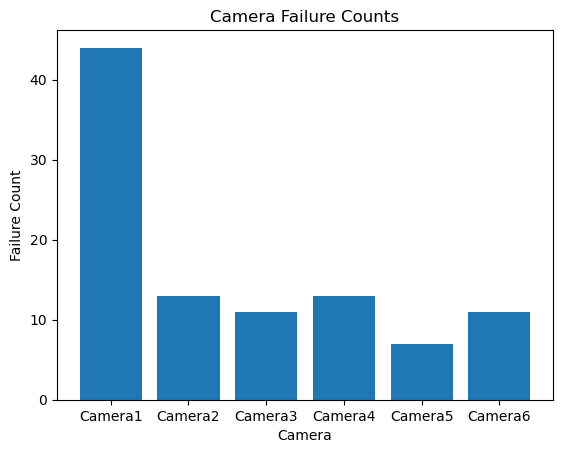

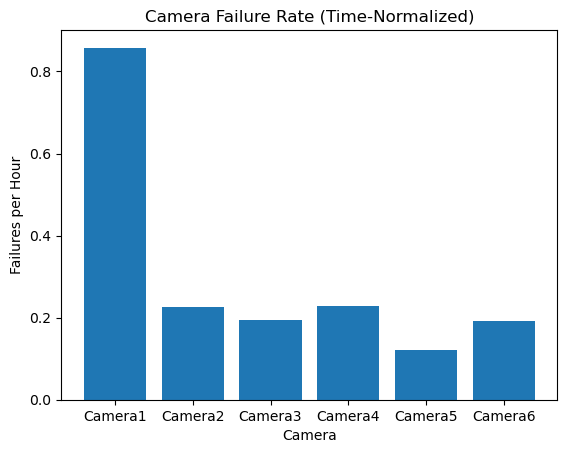

,camera,avg_prev_good
0,Camera1,1.704545
1,Camera2,1.461538
2,Camera3,0.363636
3,Camera4,1.461538
4,Camera5,0.142857
5,Camera6,0.636364


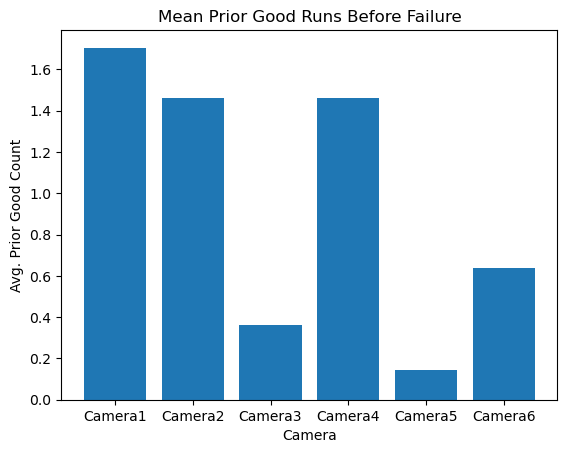

In [6]:
import os
from pathlib import Path
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import re
import csv

# ── CONFIGURE HERE ─────────────────────────────────────────────────────────
BASE_DIRS = [
    Path("/data/big_rim/rsync_dcc_sum/Oct3V1"),
    Path("/data/big_rim/rsync_dcc_sum/24summ"),
    # Add other base dirs if needed
]
IGNORE_PATTERNS = ["backup-files-rot-fix_hires_240930"]
CAMERAS = [f"Camera{i}" for i in range(1, 7)]
DATE_PATTERN = re.compile(r"^\d{4}_\d{2}_\d{2}$")

# ── HELPERS ─────────────────────────────────────────────────────────────────
def file_ctime(path: Path) -> float:
    return path.stat().st_ctime

def fmt_ts(ts: float) -> str:
    return datetime.fromtimestamp(ts).isoformat(sep=' ', timespec='seconds')

def read_total_time(meta_path: Path) -> float:
    """Read totalTime from metadata.csv robustly; return None if missing or unreadable."""
    if not meta_path.exists():
        return None
    try:
        with open(meta_path, newline='') as f:
            reader = csv.reader(f)
            for row in reader:
                if len(row) >= 2 and row[0].strip().strip('"') == "totalTime":
                    try:
                        return float(row[1].strip().strip('"'))
                    except ValueError:
                        return None
    except Exception:
        return None
    return None

# ── GATHER DATA ─────────────────────────────────────────────────────────────
rows = []
for base_dir in BASE_DIRS:
    if not base_dir.exists():
        continue
    for date_dir in sorted(base_dir.iterdir()):
        if not date_dir.is_dir() or not DATE_PATTERN.match(date_dir.name):
            continue
        good_so_far = 0
        for rec_dir in sorted(date_dir.iterdir()):
            video_root = rec_dir / "videos"
            if not rec_dir.is_dir() or not video_root.is_dir():
                continue
            if "#calib" in rec_dir.name:
                continue
            rel = rec_dir.relative_to(base_dir)
            if any(pat in str(rel) for pat in IGNORE_PATTERNS):
                continue

            missing = []
            ctimes = {}
            times = {}
            for cam in CAMERAS:
                cam_dir = video_root / cam
                ft = cam_dir / "frametimes.mat"
                meta = cam_dir / "metadata.csv"
                if ft.exists():
                    ctimes[cam] = fmt_ts(file_ctime(ft))
                    t = read_total_time(meta)
                    times[cam] = t if t is not None else 0.0
                else:
                    missing.append(cam)
                    times[cam] = 0.0

            row = {
                "base_dir": base_dir.name,
                "relative_path": f"{base_dir.name}/{rel}",
                "dead_cameras": ",".join(missing),
                "prev_good_count": good_so_far,
                "is_dead": bool(missing)
            }
            for cam in CAMERAS:
                row[f"{cam}_ctime"] = ctimes.get(cam, "")
                row[f"{cam}_time_s"] = times[cam]
            rows.append(row)
            if not missing:
                good_so_far += 1

# ── BUILD DATAFRAME ─────────────────────────────────────────────────────────
df = pd.DataFrame(rows)
display(df)

# ── SUMMARY STATS ───────────────────────────────────────────────────────────
total = len(df)
if total == 0:
    print("No events found after filtering.")
else:
    # Count-based summary
    dead_count = df["is_dead"].sum()
    good_count = total - dead_count
    percent_dead = dead_count / total * 100

    summary_counts = pd.DataFrame({
        "metric": ["total_events", "dead_events", "good_events", "percent_dead"],
        "value": [total, dead_count, good_count, f"{percent_dead:.1f}%"]
    })
    display(summary_counts)

    # Time-based summary per camera
    stats = []
    for cam in CAMERAS:
        total_time = df[f"{cam}_time_s"].sum() / 3600.0  # hours
        fail_count = df["dead_cameras"].str.contains(cam).sum()
        fail_rate_per_hr = fail_count / total_time if total_time > 0 else None
        stats.append({
            "camera": cam,
            "total_time_hr": total_time,
            "fail_count": fail_count,
            "fail_rate_per_hr": fail_rate_per_hr
        })
    time_df = pd.DataFrame(stats)
    display(time_df)

    # ── VISUALIZATIONS ───────────────────────────────────────────────────────
    # 1) Failure counts per camera
    plt.figure()
    plt.bar(time_df["camera"], time_df["fail_count"])
    plt.xlabel("Camera")
    plt.ylabel("Failure Count")
    plt.title("Camera Failure Counts")
    plt.show()

    # 2) Failure rate per hour per camera (ignoring None)
    plt.figure()
    valid = time_df.dropna(subset=["fail_rate_per_hr"])
    plt.bar(valid["camera"], valid["fail_rate_per_hr"])
    plt.xlabel("Camera")
    plt.ylabel("Failures per Hour")
    plt.title("Camera Failure Rate (Time-Normalized)")
    plt.show()

    # 3) Average previous-good-count at failure per camera
    avg_prev = []
    for cam in CAMERAS:
        prevs = df[df["dead_cameras"].str.contains(cam)]["prev_good_count"]
        if not prevs.empty:
            avg_prev.append((cam, prevs.mean()))
    avg_df = pd.DataFrame(avg_prev, columns=["camera", "avg_prev_good"])
    display(avg_df)

    plt.figure()
    plt.bar(avg_df["camera"], avg_df["avg_prev_good"])
    plt.xlabel("Camera")
    plt.ylabel("Avg. Prior Good Count")
    plt.title("Mean Prior Good Runs Before Failure")
    plt.show()
